## Dependencias 

In [32]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.datasets import load_iris
cf.go_offline()

## Cargar Datos

In [4]:
X, y = load_iris(return_X_y=True)

In [7]:
data = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
data['species'] = y 

In [9]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,2
114,5.8,2.8,5.1,2.4,2
75,6.6,3.0,4.4,1.4,1
14,5.8,4.0,1.2,0.2,0
11,4.8,3.4,1.6,0.2,0


## Visualización de los datos 

In [10]:
data['species_str'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

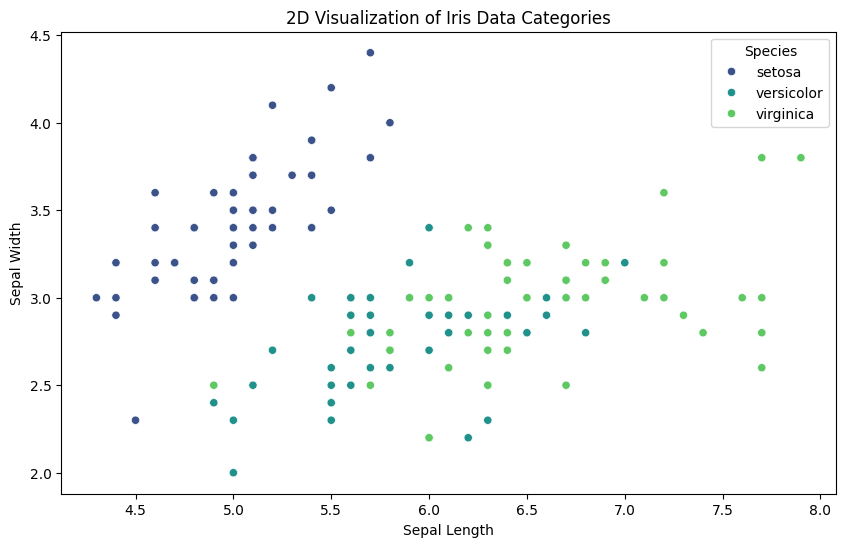

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species_str', palette='viridis')
plt.title('2D Visualization of Iris Data Categories')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.show()

## Partición

In [17]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)
train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
train.shape, valid.shape

((105, 6), (45, 6))

## Aprendizaje

In [19]:
varc = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [18]:
dt = DecisionTreeClassifier()

In [20]:
dt.fit(train[varc], train['species'])

DecisionTreeClassifier()

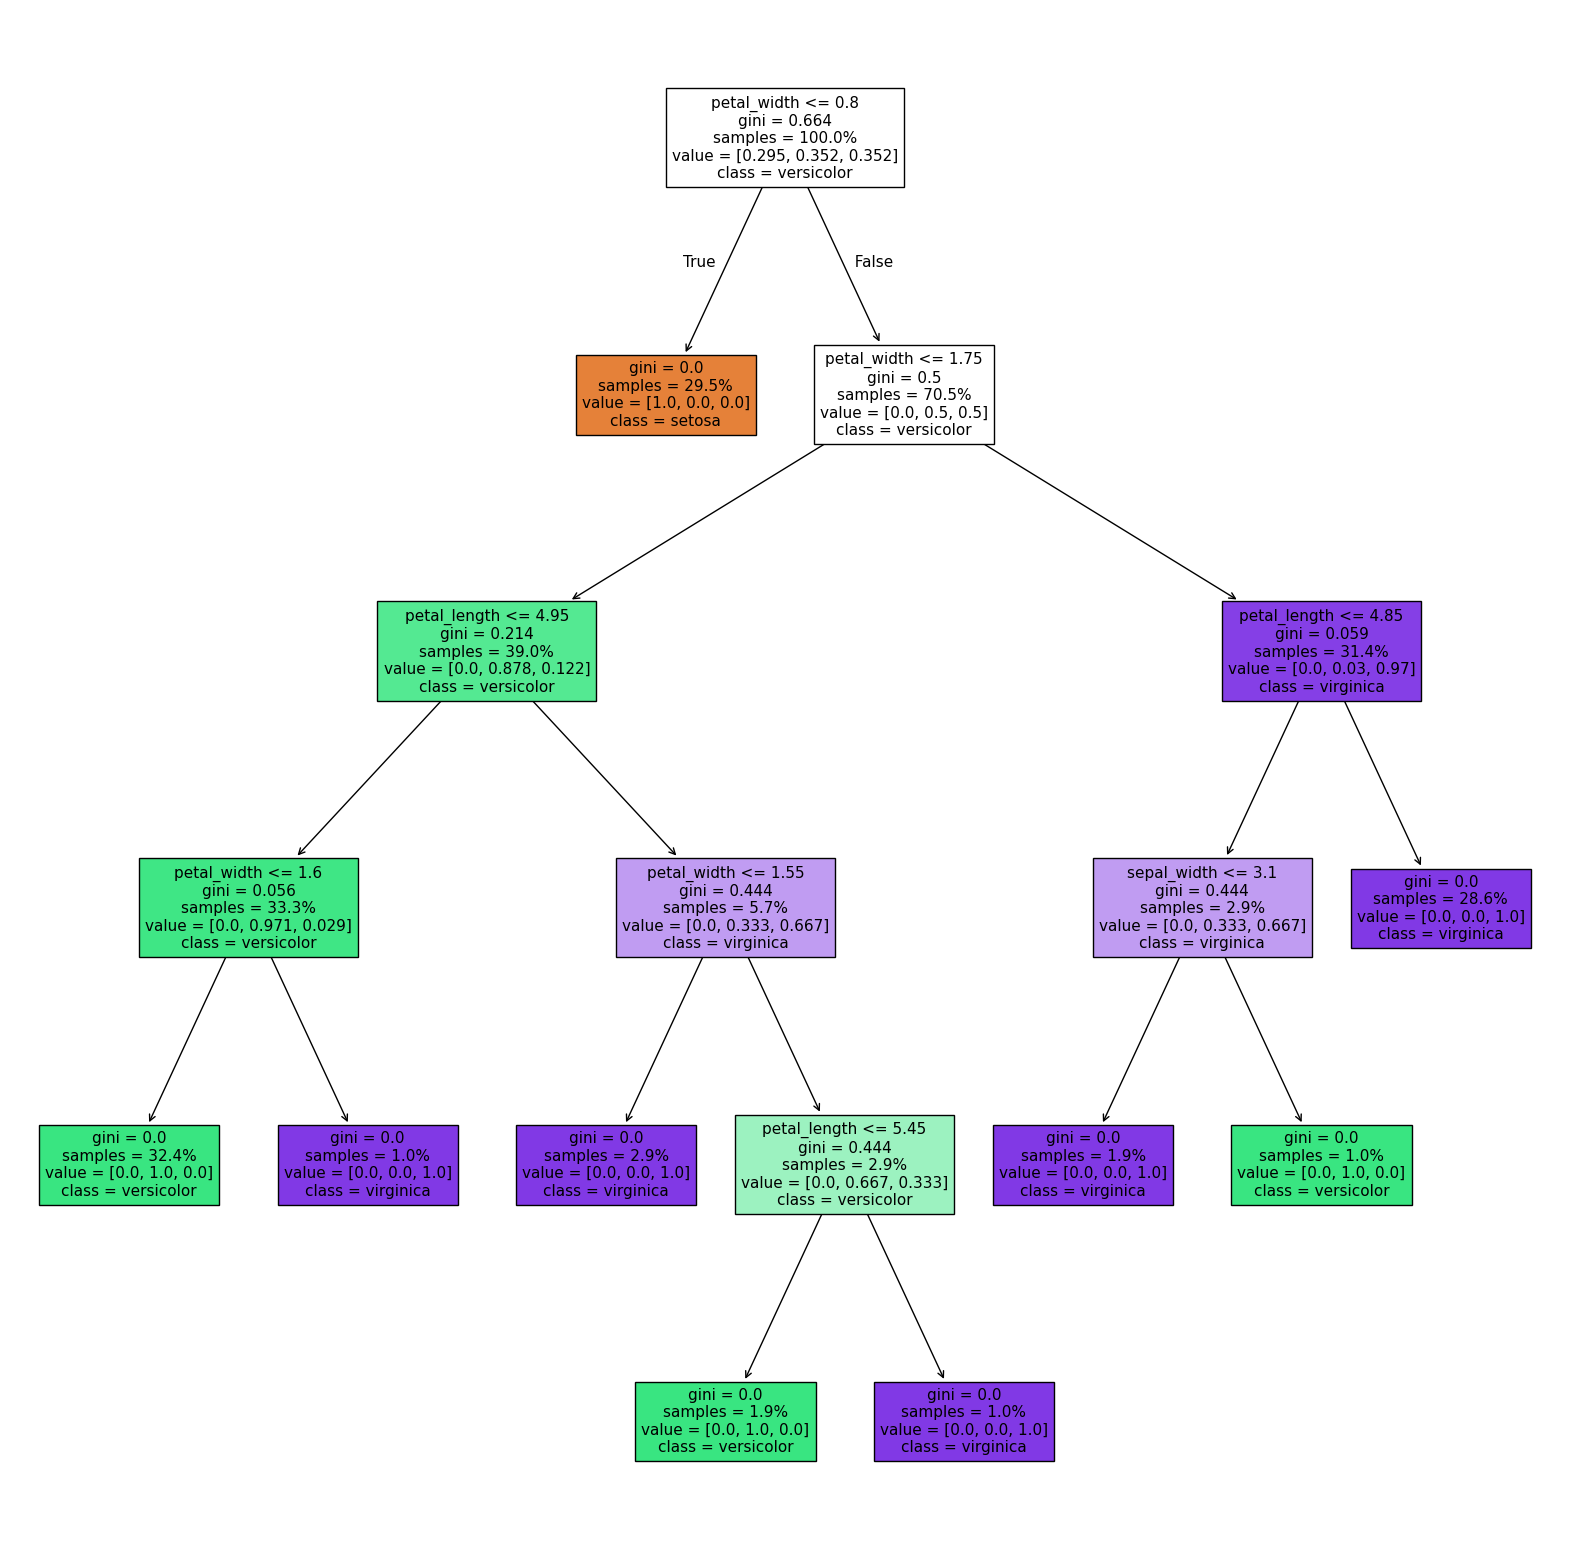

In [27]:
plt.figure(figsize=(20, 20))
plot_tree(dt, 
          feature_names=varc, 
          class_names=['setosa', 'versicolor', 'virginica'], 
          proportion=True,
          filled=True)
plt.show()

In [33]:
tree_rules = export_text(dt, feature_names=varc)
print(tree_rules)

|--- petal_width <= 0.80
|   |--- class: 0
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.60
|   |   |   |   |--- class: 1
|   |   |   |--- petal_width >  1.60
|   |   |   |   |--- class: 2
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- sepal_width <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal_width >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal_length >  4.85
|   |   |   |--- class: 2



## Evaluación del modelo 

In [28]:
print('Train Accuracy:', accuracy_score(y_true=train['species'], 
                                        y_pred=dt.predict(train[varc])))
print('Valid Accuracy:', accuracy_score(y_true=valid['species'],
                                        y_pred=dt.predict(valid[varc])))

Train Accuracy: 1.0
Valid Accuracy: 1.0


In [29]:
print('Train Classification Report:\n', classification_report(y_true=train['species'],
                                                                y_pred=dt.predict(train[varc])))
print('Valid Classification Report:\n', classification_report(y_true=valid['species'],
                                                                y_pred=dt.predict(valid[varc])))

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Valid Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [30]:
print('Train Confusion Matrix:\n', confusion_matrix(y_true=train['species'],
                                                    y_pred=dt.predict(train[varc])))
print('Valid Confusion Matrix:\n', confusion_matrix(y_true=valid['species'],
                                                    y_pred=dt.predict(valid[varc])))


Train Confusion Matrix:
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Valid Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
